In [1]:
import numpy as np
import pandas as pd
import pyextremes

# Read data

In [2]:
data = (
    pd.read_csv("https://zenodo.org/record/5776173/files/df.csv?download=1")
    .loc[:, ["times", "ssta"]]
    .astype({"times": np.datetime64, "ssta": float})
    .set_index("times")
    .squeeze()
    .sort_index(ascending=True)
)
data.head()

times
2010-01-01    0.127033
2010-01-02    0.207368
2010-01-03    0.196792
2010-01-04    0.275334
2010-01-05    0.172965
Name: ssta, dtype: float64

# Extract extremes

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='times', ylabel='ssta'>)

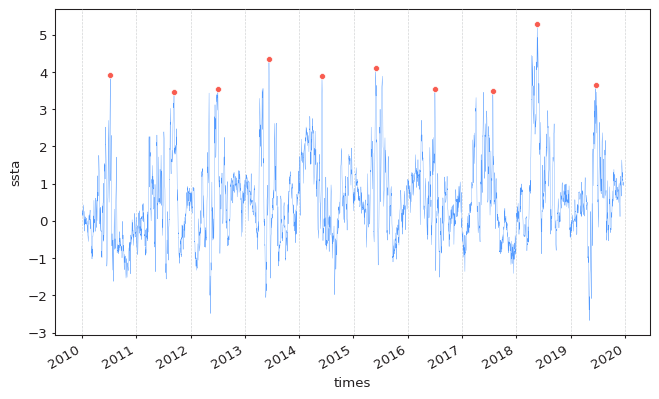

In [3]:
model = pyextremes.EVA(data)
model.get_extremes("BM")
model.plot_extremes()

# Fit model

In [4]:
model.fit_model("Emcee", )

(<Figure size 768x384 with 2 Axes>,
 [<AxesSubplot:ylabel='Location, $\\mu$'>,
  <AxesSubplot:xlabel='Sample number', ylabel='Scale, $\\sigma$'>])

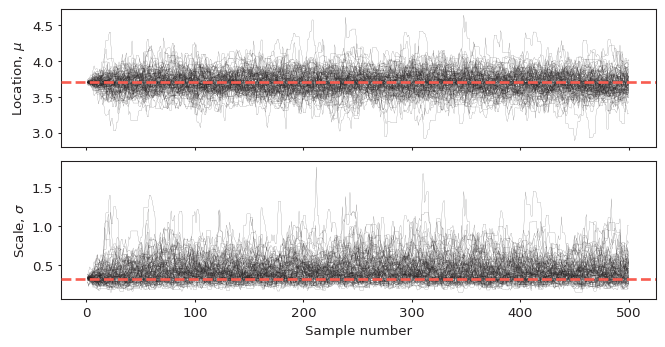

In [5]:
model.plot_trace()

(<Figure size 768x768 with 3 Axes>,
 [[<AxesSubplot:ylabel='Location, $\\mu$'>, None],
  [<AxesSubplot:xlabel='Location, $\\mu$', ylabel='Scale, $\\sigma$'>,
   <AxesSubplot:xlabel='Scale, $\\sigma$'>]])

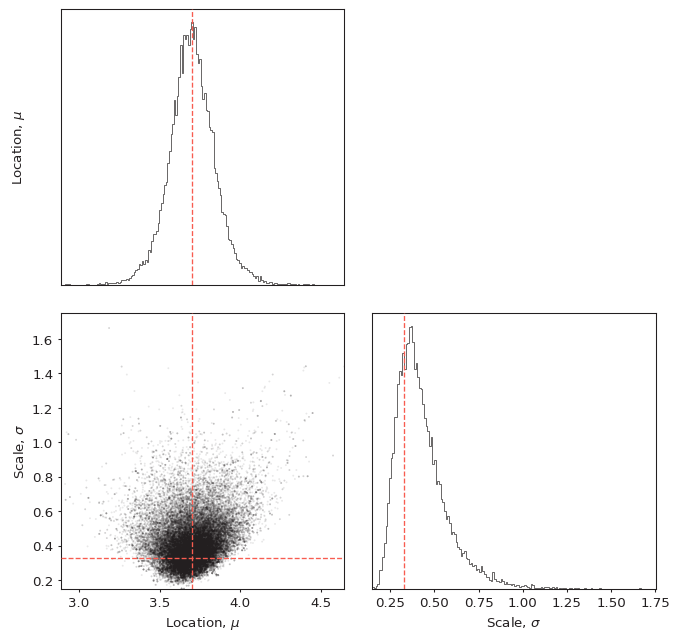

In [6]:
model.plot_corner(burn_in=50)

# Get results

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='ssta'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='ssta', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

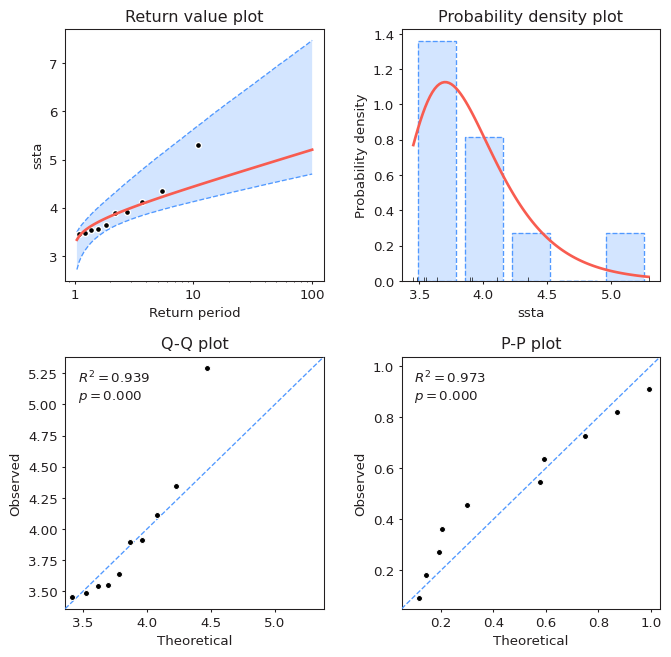

In [7]:
model.plot_diagnostic(return_period=np.logspace(0, 2, 100), alpha=0.95, burn_in=50)

In [8]:
summary = model.get_summary(
    return_period=[2, 5, 10, 25, 50, 100],
    alpha=0.95,
    burn_in=50,
)
summary

,return value,lower ci,upper ci
return period,,,
2.0,3.821780,3.571286,4.227782
5.0,4.191858,3.932196,5.047424
10.0,4.436881,4.125165,5.626307
25.0,4.746469,4.360724,6.371336
50.0,4.976139,4.532304,6.926163
100.0,5.204113,4.698774,7.474311


In [9]:
return_values = summary.loc[:, "return value"].values
return_values

array([3.82178036, 4.19185775, 4.43688117, 4.74646893, 4.97613881,
       5.20411284])